# Data Wrangling & Analysis 



In the below analyses I'm Tring to wrangle WeRateDogs Twitter data to create clean and tidy dataset . The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

In [2]:
#  import the required libraries.
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_colwidth', -1)

## Gathering Data

##### <i>1. Twitter csv file
##### <i>2. Twitter tsv file for  Image Predictions</i>
##### <i>3. Get data using Twitter API </i>m

In [3]:
# Load CSV File
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Import & write Image Predictions 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), 'wb') as file:
    file.write(response.content)
    
# Read Image Predictions 
pred = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')
pred.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
742,687460506001633280,https://pbs.twimg.com/media/CYpZrtDWwAE8Kpw.jpg,1,Boston_bull,0.223366,True,boxer,0.183596,True,French_bulldog,0.176916,True
1960,866334964761202691,https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg,1,Samoyed,0.984086,True,Pomeranian,0.007919,True,keeshond,0.003328,True
1605,800443802682937345,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False
104,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,0.214200,True,bath_towel,0.146789,False,Chihuahua,0.104152,True


In [6]:

# Twitter API Credentials
consumer_key = 'Nzxm7H89CPiQXyLjwLNfknHxH'
consumer_secret = 'RFRkN5Hl755hYi39CKMfU8xgfmpCg1UWXJ4AMCCTkb2aveGpNj'
access_token = '2417302783-g5bumDHBmAv0vz8mxc5TTjfyPjuPCDFp5vpcgLT'
access_secret = 'xsTHlHh8Sz3rSUeFLCgvq1ZKB1ifpVHz0F5OrhYDxAWr6'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [7]:
tweet_ids = list(twitter_arch['tweet_id'])

t = time.process_time()

# Store Twitter API data
with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, 
                                   tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
            print(tweet_id)
        except Exception as e:
            print(e)

elapsed_time = time.process_time()-t
print(elapsed_time)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270

In [8]:
# Load data using Twitter API
df_list = []

with open('tweet_json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_list.append({'tweet_id': tweet_line['id'],
                        'favorites': tweet_line['favorite_count'],
                        'retweets': tweet_line['retweet_count']})
        
twitter_api = pd.DataFrame(df_list)
print(twitter_api)

      favorites  retweets            tweet_id
0     37368      8054      892420643555336193
1     32126      5984      892177421306343426
2     24216      3955      891815181378084864
3     40674      8231      891689557279858688
4     38891      8909      891327558926688256
5     19555      2965      891087950875897856
6     11419      1957      890971913173991426
7     63003      17956     890729181411237888
8     26896      4059      890609185150312448
9     30826      7012      890240255349198849
10    29639      6974      890006608113172480
11    26898      4739      889880896479866881
12    46461      9542      889665388333682689
13    26166      4288      889638837579907072
14    14606      2142      889531135344209921
15    24377      5105      889278841981685760
16    28136      4288      888917238123831296
17    24698      4058      888804989199671297
18    19138      3347      888554962724278272
19    21024      3307      888078434458587136
20    29157      5122      8877052

## Data Assessement

### 1. Visual assessment


#### <i>1.a csv File</i>

In [12]:
# Display the Twitter Archive File
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

The file includes 2,356 rows and 17 columns as follows:

#### <i>1.b tsv File</i>

In [214]:
# Display the Image Predictions File
pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


The file includes 2,075 rows and 12 columns as follows:

#### <i>1.c json File</i>

In [215]:
# Display Twitter Data from the API
twitter_api

,favorites,retweets,tweet_id
0,37370,8060,892420643555336193
1,32133,5988,892177421306343426
2,24220,3957,891815181378084864
3,40678,8234,891689557279858688
4,38904,8912,891327558926688256
5,19555,2968,891087950875897856
6,11420,1957,890971913173991426
7,63009,17972,890729181411237888
8,26897,4064,890609185150312448
9,30833,7012,890240255349198849


This file includes originally 2,342 rows and 8 columns as follows - however, we keep the favorites, retweets and tweet_id columns only as the other ones are not needed:

- **favorites**: Number of likes
- **followers**: Number of followers
- **full_text**: Caption
- **hashtag**: Hashtags used in the tweet
- **retweeted**: Indicates whether this Tweet has been Retweeted by the authenticating user.
- **retweets**: Number of times this Tweet has been retweeted
- **timestamp**: Date & time when the tweet has been sent
- **tweet_id**: The unique identifier for each tweet

### 2. Programmatic assessment

#### <i>2.a csv File</i>

In [10]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [13]:
twitter_arch.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1763,678446151570427904,NaN,NaN,2015-12-20 05:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Touching scene here. Really stirs up the emotions. The bond between father &amp; son. So beautiful. 10/10 for both pups https://t.co/AJWJHov5gx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678446151570427904/photo/1,10,10,None,None,None,None,None


In [218]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [220]:
twitter_arch.tweet_id.duplicated().sum()

0

In [221]:
# Look text including ratings with a decimal numerator up
twitter_arch.loc[twitter_arch.text.str.contains(r"(\d+\.\d*\/\d+)")].text

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1689    I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                       
1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                    

In [222]:
# Check rating numerator in text VS numerator column
twitter_arch[twitter_arch['text'].str.contains('\d+\.\d+/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [223]:
# Check all numerator that are not 10
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [224]:
twitter_arch.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [225]:
# Look for tweets where the rating numerator is not 10
twitter_arch[twitter_arch['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [226]:
# Look at dog's name
twitter_arch.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Lucy         11 
Cooper       11 
Lola         10 
Penny        10 
Tucker       10 
Winston      9  
Bo           9  
the          8  
Sadie        8  
Daisy        7  
Bailey       7  
Toby         7  
Buddy        7  
an           7  
Jax          6  
Koda         6  
Leo          6  
Stanley      6  
Bella        6  
Jack         6  
Oscar        6  
Scout        6  
Rusty        6  
Dave         6  
Milo         6  
Oakley       5  
            ..  
Gin          1  
Staniel      1  
Jonah        1  
Ronduh       1  
Shadoe       1  
Rudy         1  
Raphael      1  
Norman       1  
Shnuggles    1  
Asher        1  
Pinot        1  
Miguel       1  
Fwed         1  
Huxley       1  
Napolean     1  
Mark         1  
Bobbay       1  
Tessa        1  
Newt         1  
Frönq        1  
Ralpher      1  
Halo         1  
Stark        1  
Harrison     1  
Amy          1  
Tycho        1  
Eazy         1  
Godi         1

In [227]:
# Look at dog's names with a lowercase - likely not a real name
twitter_arch.loc[(twitter_arch.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [228]:
# Look up number of retweets 
len((twitter_arch[twitter_arch['text'].str.startswith('RT') == True]))

183

In [229]:
# Look for name included in the text column but not in the name column
twitter_arch[twitter_arch['text'].str.contains('names are|name to')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007768551424/photo/1,10,10,None,None,None,None,None


In [230]:
# Look for tweets with no image
twitter_arch['expanded_urls'].isnull().value_counts()

False    2297
True     59  
Name: expanded_urls, dtype: int64

#### <i>2.b tsv File</i>

In [231]:
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [232]:
pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
1720,819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,black-and-tan_coonhound,0.044120,True,Doberman,0.031835,True
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False


In [233]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [234]:
pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [235]:
pred.tweet_id.duplicated().sum()

0

In [236]:
# Count images based on the confident prediction
pred.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

#### <i>2.c json File</i>

In [237]:
twitter_api.head()

,favorites,retweets,tweet_id
0,37370,8060,892420643555336193
1,32133,5988,892177421306343426
2,24220,3957,891815181378084864
3,40678,8234,891689557279858688
4,38904,8912,891327558926688256


In [238]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
favorites    2334 non-null int64
retweets     2334 non-null int64
tweet_id     2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [239]:
twitter_api.describe()

,favorites,retweets,tweet_id
count,2334.000000,2334.000000,2.334000e+03
mean,7790.703513,2833.523565,7.419439e+17
std,12089.753751,4795.865858,6.819580e+16
min,0.000000,1.000000,6.660209e+17
25%,1353.750000,571.250000,6.782926e+17
50%,3392.500000,1326.500000,7.184574e+17
75%,9556.750000,3307.500000,7.986600e+17
max,161432.000000,81404.000000,8.924206e+17


Here are the issues that we could notice:

#### Tidiness Issues:
- Merging the three dataframes into one using tweet_id with a (inner) join condition
- Joining the dog stages into a single column instead of four
- Numerous columns to be deleted.
<br><br>

#### Quality Issues:

- Tweet_id, timestamp, sources, img_num and dog_stages need to be converted into the right datatype
- Sources to be clearly defined such as Twitter for iPhone, Twitter Web Client, Vine - Make a Scene & TweetDeck
- Dog name is not always accurate: 'a', 'actually', 'all', 'by', 'getting' etc
- Missing values in the dog stages column showing up as 'None'
- 183 retweets to be deleted
- In the text, we can notice some decimal numbers for the ratings (x5) ==> numerator part wrongly extracted
- Some numerators are higher than 10
- Some tweets don't include images
- Some breeds in p1, p2, and p3 (Image Prediction File) have upper cases (first letter).

## Cleaning Data

In [15]:
# Copies of the original pieces of data
df_clean = twitter_arch.copy()
df2_clean = pred.copy()
df3_clean = twitter_api.copy()

Many tidy and quality issues have been pointed out, however only 3 tidy issues and 8 quality issues will be addressed in this project.

### 1. TIDINESS (3)

<i>"Messy data, also known as untidy data. Untidy data has structural issues."</i>

### ISSUE #1: Dataframe Combination

#### Define
First, let's start by merging the three dataframes.

#### Code

In [16]:
# Join df_clean & df3_clean on tweet_id
df4 = pd.merge(df_clean, df3_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

# Join df4 with df2_clean (Image Predictions)
df5 = pd.merge(df4, df2_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

#### Test

In [17]:
# Make sure it is working
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 30 columns):
tweet_id                      2062 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2062 non-null object
source                        2062 non-null object
text                          2062 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2062 non-null object
rating_numerator              2062 non-null int64
rating_denominator            2062 non-null int64
name                          2062 non-null object
doggo                         2062 non-null object
floofer                       2062 non-null object
pupper                        2062 non-null object
puppo                         2062 non-null object
favorites                     2062 

In [18]:
# Save new dataset for next sections
df5.to_csv('twitter_archive_master.csv', index=False)

In [19]:
master_arch = pd.read_csv('twitter_archive_master.csv')

In [20]:
master_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
951,724046343203856385,NaN,NaN,2016-04-24 01:24:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Sarge. Not even he knows what his tongue is doing, but it's pretty damn spectacular. 10/10 https://t.co/pIQEdbBxdL",NaN,NaN,NaN,https://twitter.com/dog_rates/status/724046343203856385/photo/1,...,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True
220,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://t.co/act3duiqbL,8.392899e+17,41198418.0,2017-03-08 01:41:24 +0000,"https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1",...,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False
832,745712589599014916,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Percy. He fell asleep at the wheel. Irresponsible af. 7/10 absolute menace on the roadway https://t.co/QHbvtvaw8E,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589599014916/photo/1,...,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
463,799757965289017345,NaN,NaN,2016-11-18 23:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sobe. She's a h*ckin happy doggo. Only one leg tho. Must have good balance. 13/10 would smile back https://t.co/OiH8PaOxB1,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/799757965289017345/photo/1,https://twitter.com/dog_rates/status/799757965289017345/photo/1,https://twitter.com/dog_rates/status/799757965289017345/photo/1,https://twitter.com/dog_rates/status/799757965289017345/photo/1",...,1,Border_collie,0.442534,True,collie,0.288684,True,Shetland_sheepdog,0.196399,True
917,730427201120833536,NaN,NaN,2016-05-11 15:59:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crystal. She's flawless. Really wants to be a frat bro. 11/10 who does she even know here? https://t.co/WyqNFvEulG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730427201120833536/photo/1,...,1,Eskimo_dog,0.682082,True,Siberian_husky,0.289288,True,Staffordshire_bullterrier,0.008771,True


### ISSUE #2: Doggo, Floofer, Pupper, Puppo columns

#### Define

Combine dog stages into one column.

#### Code

In [21]:
# Create and merge dog stages into one column
master_arch['dog_stages'] = master_arch.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop the unnecessary columns
master_arch.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [22]:
# Test
master_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
218,839990271299457024,NaN,NaN,2017-03-10 00:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sojourner. His nose is a Fibonacci Spiral. Legendary af. 13/10 we must protect him at all costs https://t.co/r7W1NbkOtr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/839990271299457024/photo/1,https://twitter.com/dog_rates/status/839990271299457024/photo/1",...,Staffordshire_bullterrier,0.604938,True,American_Staffordshire_terrier,0.311540,True,Boston_bull,0.037159,True,NaN
1757,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scruffers. He's being violated on multiple levels and is not happy about it. 9/10 hang in there Scruffers https://t.co/nLQoltwEZ7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671518598289059840/photo/1,...,Lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True,NaN
33,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",...,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True,NaN
485,796149749086875649,NaN,NaN,2016-11-09 00:37:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ruby. She just turned on the news. Officially terrified. 11/10 deep breaths Ruby https://t.co/y5KarNXWXt,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/796149749086875649/photo/1,https://twitter.com/dog_rates/status/796149749086875649/photo/1",...,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False,NaN
1208,696488710901260288,NaN,NaN,2016-02-08 00:20:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 revolutionary af https://t.co/zKzq4nIY86,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696488710901260288/photo/1,...,briard,0.369063,True,Scotch_terrier,0.168204,True,giant_schnauzer,0.120553,True,NaN


### ISSUE #3: Drop unnecessary columns for the analysis

#### Define

Remove columns that will be not used.

In [23]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 27 columns):
tweet_id                      2062 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2062 non-null object
source                        2062 non-null object
text                          2062 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2062 non-null object
rating_numerator              2062 non-null int64
rating_denominator            2062 non-null int64
name                          2062 non-null object
favorites                     2062 non-null int64
retweets                      2062 non-null int64
jpg_url                       2062 non-null object
img_num                       2062 non-null int64
p1                            2062 non

#### Code

In [24]:
# Delete the columns I won't be using as they shouldn't be useful in the analysis.
master_arch.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','p1_conf','p1_dog', 'p2_conf','p2_dog', 'p3_conf','p3_dog'], axis=1, inplace=True)

#### Test

In [25]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 16 columns):
tweet_id              2062 non-null int64
timestamp             2062 non-null object
source                2062 non-null object
text                  2062 non-null object
expanded_urls         2062 non-null object
rating_numerator      2062 non-null int64
rating_denominator    2062 non-null int64
name                  2062 non-null object
favorites             2062 non-null int64
retweets              2062 non-null int64
jpg_url               2062 non-null object
img_num               2062 non-null int64
p1                    2062 non-null object
p2                    2062 non-null object
p3                    2062 non-null object
dog_stages            335 non-null object
dtypes: int64(6), object(10)
memory usage: 257.8+ KB


### 2. QUALITY (8)

<i>"Dirty data, also known as low quality data. Low quality data has content issues."</i>


### ISSUE #1: Tweet_id, timestamp,  sources, img_num and dog_stages to be converted

#### Define

Get the right datatype.


#### Code

In [26]:
master_arch['tweet_id'] = master_arch['tweet_id'].astype(str)
master_arch['timestamp'] = pd.to_datetime(master_arch['timestamp'])
master_arch['source'] = master_arch['source'].astype('category')
master_arch['img_num'] = master_arch['img_num'].astype('category')
master_arch['dog_stages'] = master_arch['dog_stages'].astype('category')

#### Test

In [27]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 16 columns):
tweet_id              2062 non-null object
timestamp             2062 non-null datetime64[ns]
source                2062 non-null category
text                  2062 non-null object
expanded_urls         2062 non-null object
rating_numerator      2062 non-null int64
rating_denominator    2062 non-null int64
name                  2062 non-null object
favorites             2062 non-null int64
retweets              2062 non-null int64
jpg_url               2062 non-null object
img_num               2062 non-null category
p1                    2062 non-null object
p2                    2062 non-null object
p3                    2062 non-null object
dog_stages            335 non-null category
dtypes: category(3), datetime64[ns](1), int64(4), object(8)
memory usage: 216.0+ KB


### ISSUE #2: Relevant Sources

#### Define

Get rid of all href tags for ease of reading.

#### Code

In [28]:
import re

href_tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return href_tags.sub('', text)

master_arch['source'] = master_arch['source'].apply(remove_tags)

#### Test

In [29]:
master_arch.source.sample(3)

912     Twitter for iPhone
642     Twitter for iPhone
1135    Twitter for iPhone
Name: source, dtype: category
Categories (3, object): [Twitter Web Client, Twitter for iPhone, TweetDeck]

In [30]:
master_arch.source.value_counts()

Twitter for iPhone    2022
Twitter Web Client    30  
TweetDeck             10  
Name: source, dtype: int64

All tweets from Vine are not included in the new dataset.

### ISSUE #3: Dog's name accuracy

#### Define

Need to replace name that are likely not real such as 'a', 'an' etc.

#### Code

In [31]:
dogsname = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for word in dogsname:
    master_arch.loc[master_arch.name == word, 'name'] = None

#### Test

In [32]:
master_arch.name.value_counts()

Oliver      10
Penny       10
Cooper      10
Charlie     10
Tucker      10
Lucy        9 
Bo          8 
Sadie       8 
Lola        8 
Winston     8 
Daisy       7 
Toby        7 
Scout       6 
Dave        6 
Bella       6 
Koda        6 
Rusty       6 
Milo        6 
Bailey      6 
Stanley     6 
Jax         6 
Larry       5 
Alfie       5 
Chester     5 
Leo         5 
Oscar       5 
Buddy       5 
Louis       5 
Archie      4 
Gary        4 
           .. 
Miguel      1 
Sailor      1 
Reagan      1 
Lorelei     1 
Filup       1 
Gunner      1 
Barney      1 
Ito         1 
Gin         1 
Rolf        1 
Sundance    1 
Alfy        1 
Clybe       1 
Venti       1 
Jackie      1 
Philbert    1 
Patch       1 
Trigger     1 
Jareld      1 
Snoop       1 
O           1 
Cuddles     1 
Thor        1 
Crouton     1 
Cannon      1 
Cermet      1 
Lance       1 
Benny       1 
Harnold     1 
Gidget      1 
Name: name, Length: 921, dtype: int64

### ISSUE #4: Dog Stages replaced by 'None'

#### Define

Replace missing dog stages by 'None'.

#### Code

In [33]:
type_stages = ['dog_stages']

for dog_stages in type_stages:
    master_arch.loc[master_arch[dog_stages] == 'None', dog_stages] = None

#### Test

In [34]:
master_arch.dog_stages.value_counts()

pupper     231
doggo      73 
puppo      28 
floofer    3  
Name: dog_stages, dtype: int64

In [35]:
master_arch.dog_stages.head(10)

0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6    NaN  
7    NaN  
8    NaN  
9    doggo
Name: dog_stages, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

In [36]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 16 columns):
tweet_id              2062 non-null object
timestamp             2062 non-null datetime64[ns]
source                2062 non-null category
text                  2062 non-null object
expanded_urls         2062 non-null object
rating_numerator      2062 non-null int64
rating_denominator    2062 non-null int64
name                  1398 non-null object
favorites             2062 non-null int64
retweets              2062 non-null int64
jpg_url               2062 non-null object
img_num               2062 non-null category
p1                    2062 non-null object
p2                    2062 non-null object
p3                    2062 non-null object
dog_stages            335 non-null category
dtypes: category(3), datetime64[ns](1), int64(4), object(8)
memory usage: 216.0+ KB


### ISSUE #5: Getting rid of retweets

#### Define

There are some retweets that we can point out as they start with 'RT' in the text column. We don't want them, so we'll take them out.

#### Code

In [37]:
master_arch.loc[master_arch['text'].str.startswith('RT') != False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,img_num,p1,p2,p3,dog_stages
32,885311592912609280,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,0,17629,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,seat_belt,pug,NaN
67,877611172832227328,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,0,78,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,golden_retriever,Irish_terrier,pupper
107,867072653475098625,2017-05-23 17:40:04,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG,"https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1",13,10,None,0,119,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,papillon,Pekinese,NaN
130,860924035999428608,2017-05-06 18:27:40,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9,"https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1",13,10,None,0,799,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,oscilloscope,paper_towel,NaN
167,851861385021730816,2017-04-11 18:15:55,Twitter for iPhone,RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,"https://twitter.com/eddie_coe98/status/848289382176100353/photo/1,https://twitter.com/eddie_coe98/status/848289382176100353/photo/1",10,10,None,0,21,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,purse,pillow,NaN
182,847971574464610304,2017-04-01 00:39:12,Twitter for iPhone,RT @basic_vacek_: I love my new mug easy 13/10 @dog_rates https://t.co/0bYtoL7Wwt,"https://twitter.com/basic_vacek_/status/847971000004354048/photo/1,https://twitter.com/basic_vacek_/status/847971000004354048/photo/1",13,10,None,0,442,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,cup,toilet_tissue,NaN
209,841833993020538882,2017-03-15 02:10:39,Twitter for iPhone,RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ,"https://twitter.com/dog_rates/status/817423860136083457/video/1,https://twitter.com/dog_rates/status/817423860136083457/video/1",13,10,Ken,0,15792,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,Samoyed,Eskimo_dog,NaN
220,839290600511926273,2017-03-08 01:44:07,Twitter for iPhone,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://t.co/act3duiqbL,"https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1",10,10,None,0,148,https://pbs.twimg.com/media

In [38]:
master_arch = master_arch.loc[master_arch['text'].str.startswith('RT') == False]

#### Test

In [39]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2061
Data columns (total 16 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
source                1987 non-null category
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1355 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
jpg_url               1987 non-null object
img_num               1987 non-null category
p1                    1987 non-null object
p2                    1987 non-null object
p3                    1987 non-null object
dog_stages            324 non-null category
dtypes: category(3), datetime64[ns](1), int64(4), object(8)
memory usage: 223.6+ KB


### ISSUE #6: Creating a new ratings column

#### Define


We want the numerator and denominator in a single column.

In [40]:
rating = master_arch.text.str.extract('(\d+(\.\d+)*\/\d+)')

#### Test

In [41]:
# Create a new rating column

master_arch['rating'] = rating[0]

In [42]:
master_arch

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,img_num,p1,p2,p3,dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,37368,8054,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,32126,5984,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,24216,3955,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,40674,8231,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,38891,8909,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN,12/10
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,19555,2965,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,NaN,13/10
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,11419,1957,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,NaN,13/10
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,63003,17956,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,Eskimo_dog,Pembroke,NaN,13/10
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,26896,4059,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,NaN,13/10
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory

### ISSUE #7: Drop numerator and denominator columns

#### Define

Get rid of unwanted columns

#### Code

In [43]:
master_arch.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [44]:
# Test
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2061
Data columns (total 15 columns):
tweet_id         1987 non-null object
timestamp        1987 non-null datetime64[ns]
source           1987 non-null category
text             1987 non-null object
expanded_urls    1987 non-null object
name             1355 non-null object
favorites        1987 non-null int64
retweets         1987 non-null int64
jpg_url          1987 non-null object
img_num          1987 non-null category
p1               1987 non-null object
p2               1987 non-null object
p3               1987 non-null object
dog_stages       324 non-null category
rating           1987 non-null object
dtypes: category(3), datetime64[ns](1), int64(2), object(9)
memory usage: 208.1+ KB


### ISSUE #8: Tweets with no image`

#### Define

Remove all tweets that don't include any image.

#### Code

In [45]:
master_arch = master_arch.dropna(subset=['expanded_urls'])

#### Test

In [46]:
master_arch['expanded_urls'].isnull().value_counts()

False    1987
Name: expanded_urls, dtype: int64

### ISSUE #9:  p1, p2, p3 in lowercase

#### Define

First letter of some breeds is uppercase ==> changing all in lowercase.

#### Code

In [47]:
master_arch['p1'] = master_arch['p1'].str.lower()
master_arch['p2'] = master_arch['p2'].str.lower()
master_arch['p3'] = master_arch['p3'].str.lower()

#### Test

In [48]:
master_arch.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,favorites,retweets,jpg_url,img_num,p1,p2,p3,dog_stages,rating
1625,674410619106390016,2015-12-09 02:09:56,Twitter for iPhone,This is Lenny. He wants to be a sprinkler. 10/10 you got this Lenny https://t.co/CZ0YaB40Hn,https://twitter.com/dog_rates/status/674410619106390016/photo/1,Lenny,1203,472,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1,brown_bear,sea_lion,beagle,NaN,10/10
1470,679158373988876288,2015-12-22 04:35:49,Twitter for iPhone,This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,https://twitter.com/dog_rates/status/679158373988876288/photo/1,Rubio,21925,8359,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,bull_mastiff,bath_towel,NaN,11/10
342,819711362133872643,2017-01-13 01:03:12,Twitter for iPhone,This is Howie. He just bloomed. 11/10 revolutionary af https://t.co/m5fYxrO3IU,"https://twitter.com/dog_rates/status/819711362133872643/photo/1,https://twitter.com/dog_rates/status/819711362133872643/photo/1",Howie,14041,3312,https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg,2,acorn_squash,toilet_seat,toy_poodle,NaN,11/10
958,722613351520608256,2016-04-20 02:30:23,Twitter for iPhone,Meet Schnitzel. He's a Tropicana Floofboop. Getting too big for his favorite basket. 12/10 just so damn fluffy https://t.co/qjd0UJKYUY,https://twitter.com/dog_rates/status/722613351520608256/photo/1,Schnitzel,5092,1688,https://pbs.twimg.com/media/Cgc9AjMVIAERdUA.jpg,1,labrador_retriever,golden_retriever,chow,NaN,12/10
88,871879754684805121,2017-06-06 00:01:46,Twitter for iPhone,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,"https://twitter.com/dog_rates/status/871879754684805121/photo/1,https://twitter.com/dog_rates/status/871879754684805121/photo/1",Lassie,36763,10701,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,1,shetland_sheepdog,collie,pomeranian,puppo,13/10


## Save & Store New Clean Dataset

In [49]:
# Save clean dataset for next sections
master_arch.to_csv('twitter_archive_master.csv', index=False)

## Analyzing & Visualizing Data

In [50]:
df = master_arch

#### Q1. What is the repartition of the dog stages?

In [51]:
dogstages_count = df['dog_stages'].value_counts()
dogstages_count

pupper     223
doggo      71 
puppo      27 
floofer    3  
Name: dog_stages, dtype: int64

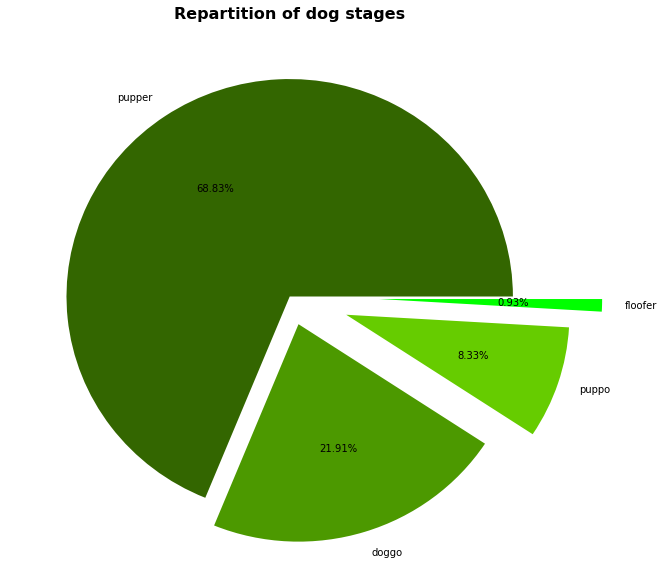

In [52]:
# Shows the repartition of the dog stages with a pie chart.
explode = np.linspace(0,0.4,4)
colors = ['#336600', '#4C9900', '#66CC00','#00FF00']
dogstages_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(10,10), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Repartition of dog stages', weight='bold', fontsize=16)
plt.savefig('DogStages.png')

#### Q2. What breed is the most popular (favorites, retweets)?

In [53]:
dog_favorites = df.groupby('p1')['favorites'].sum().sort_values(ascending=False).head(8)
dog_favorites

p1
golden_retriever      1627446
labrador_retriever    1023504
pembroke              957209 
chihuahua             664064 
samoyed               494649 
french_bulldog        450357 
chow                  391542 
pug                   301141 
Name: favorites, dtype: int64

In [54]:
dog_retweets = df.groupby('p1')['retweets'].sum().sort_values(ascending=False).head(8)
dog_retweets

p1
golden_retriever      466526
labrador_retriever    326998
pembroke              259345
chihuahua             209755
samoyed               161388
french_bulldog        111914
chow                  109169
pomeranian            99917 
Name: retweets, dtype: int64

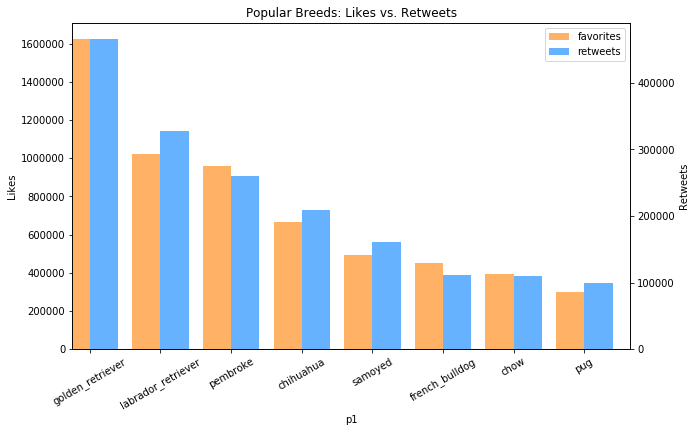

In [55]:
fig = plt.figure() # Creates matplotlib figure

ax = fig.add_subplot(111) # Creates matplotlib axes
ax2 = ax.twinx() # Creates another axes that shares the same x-axis as ax.

width = 0.4

dog_favorites.plot(figsize = (10,6), kind='bar', color='#FFB266', ax=ax, width=width, position=1, title='Popular Breeds: Likes vs. Retweets')
dog_retweets.plot(figsize = (10,6), kind='bar', color='#66B2FF', ax=ax2, width=width, position=0)

# Turns off grid on the left Axis.
ax.grid(False)

# Turns off grid on the secondary (right) Axis.
ax2.grid(False)

ax.set_ylabel('Likes')
ax2.set_ylabel('Retweets')

ax.set_xticklabels(dog_favorites.index, rotation=30)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()
plt.savefig('Popular_Breeds.png')

#### Q3. What is the most popular name?

In [56]:
name_count = df['name'].value_counts()
name_count.head(5)

Charlie    10
Oliver     10
Cooper     10
Tucker     9 
Lucy       9 
Name: name, dtype: int64

In [57]:
name_list = df['name'].value_counts().index.tolist()

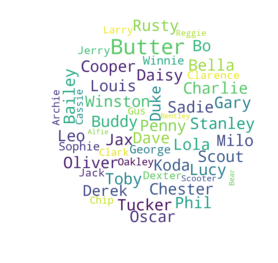

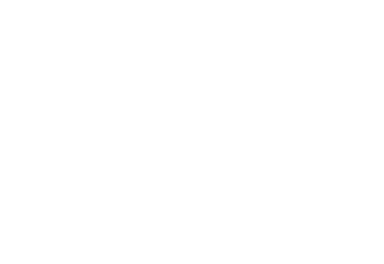

In [58]:
from subprocess import check_output
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from os import path
import csv
import matplotlib as mpl

from collections import defaultdict
import locale
locale.setlocale(locale.LC_ALL, '')

# mpl.rcParams['figure.figsize']=(8.0,6.0)   
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100              
mpl.rcParams['figure.subplot.bottom']=.1 

round_mask = np.array(Image.open("mask.png"))
df = pd.read_csv('twitter_archive_master.csv')

wordcloud = WordCloud(
                          background_color = 'white',
                          mask = round_mask,
                          max_words = 50,
                          max_font_size = 70, 
                          random_state = 42
                         ).generate(' '.join(name_list))

# Store to file
wordcloud.to_file(path.join("generatedwc.png"))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

#### Q4. Where do the tweets come from?

In [59]:
sources_count = df['source'].value_counts().head(10)
sources_count

Twitter for iPhone    1949
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

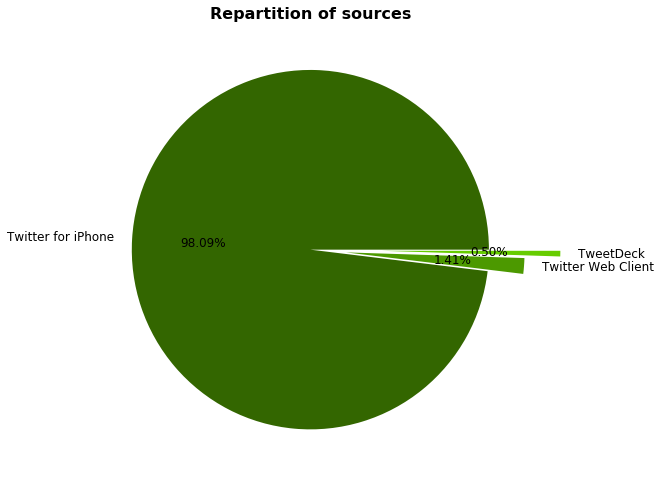

In [60]:
# Shows the repartition of the sources with a pie chart.
explode = np.linspace(0,0.4,3)
colors = ['#336600', '#4C9900', '#66CC00']
sources_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Repartition of sources', weight='bold', fontsize=16)
plt.savefig('Sources_Repartition.png')

#### Q5. What breed is the most predictible?

In [61]:
p1_count = df['p1'].value_counts().head(10)
p1_count

golden_retriever      139
labrador_retriever    93 
pembroke              88 
chihuahua             79 
pug                   54 
chow                  41 
samoyed               39 
pomeranian            38 
toy_poodle            38 
malamute              29 
Name: p1, dtype: int64

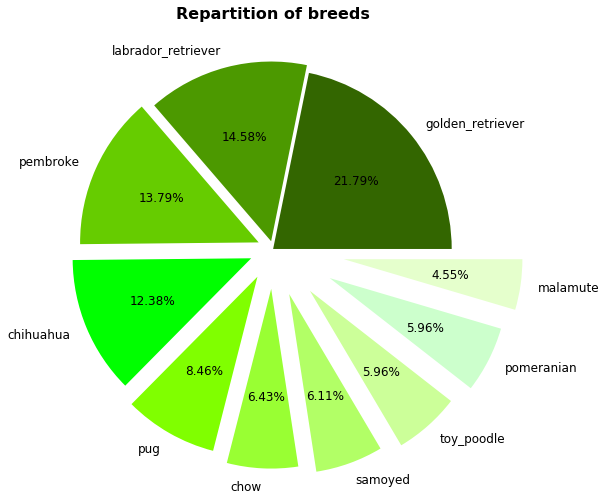

In [62]:
# Shows the repartition of the breeds with a pie chart.
explode = np.linspace(0,0.4,10)
colors = ['#336600', '#4C9900', '#66CC00','#00FF00', '#80FF00', '#99FF33', '#B2FF66', '#CCFF99', '#CCFFCC', '#E5FFCC']
p1_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Repartition of breeds', weight='bold', fontsize=16)
plt.savefig('Breeds_Repartition.png')

#### Q6. What is the trend of retweets and likes over the month?

In [63]:
df = df.rename(columns = {'timestamp':'day&hour'})

In [64]:
df

,tweet_id,day&hour,source,text,expanded_urls,name,favorites,retweets,jpg_url,img_num,p1,p2,p3,dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,37368,8054,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,32126,5984,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,pekinese,papillon,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,24216,3955,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,malamute,kelpie,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,40674,8231,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,labrador_retriever,spatula,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,38891,8909,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,english_springer,german_short-haired_pointer,NaN,12/10
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,19555,2965,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,irish_terrier,indian_elephant,NaN,13/10
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,11419,1957,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,border_collie,ice_lolly,NaN,13/10
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",NaN,63003,17956,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,eskimo_dog,pembroke,NaN,13/10
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,26896,4059,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,irish_setter,chesapeake_bay_retriever,NaN,13/10
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/st

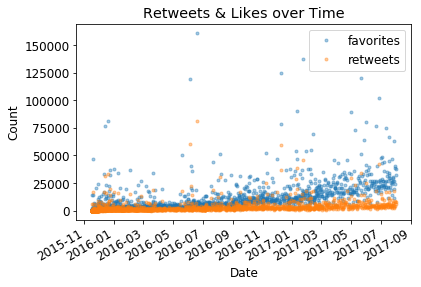

In [65]:
import datetime as dt

df['day&hour'] = pd.to_datetime(df['day&hour'])
df.set_index('day&hour', inplace=True)
x = df[['favorites', 'retweets']].plot(style = '.', alpha = .4)
x.grid(False)
plt.title('Retweets & Likes over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('Likes&Retweets.png')
plt.show()

#### Q7. Is there any relationship between likes and retweets?

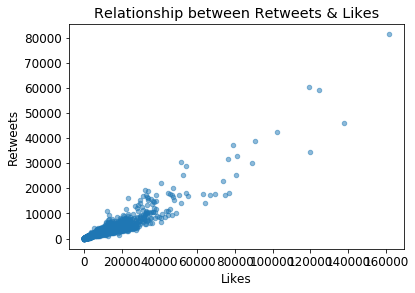

In [66]:
x = df.plot(kind = 'scatter', x = 'favorites', y = 'retweets', alpha = 0.5)
x.grid(False)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Relationship between Retweets & Likes')
plt.savefig('Retweets&LikesRelationship.png')

As we can notice, there is a positive correlation between Retweets & Likes.

#### Q8. What do the ratings look like?

In [67]:
rating_count = df['rating'].value_counts().head(10)
rating_count

12/10    449
10/10    417
11/10    396
13/10    257
9/10     150
8/10     95 
7/10     51 
14/10    35 
5/10     32 
6/10     32 
Name: rating, dtype: int64

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0